# The 8 queens puzzle
One of the simplest examples of an exact cover problem with secondary items is the [8 queens puzzle](https://en.wikipedia.org/wiki/Eight_queens_puzzle). The aim is to place 8 queens on a chessboard so that no two queens threaten each other.
Each row and column of the chessboard must have one and only one queen: the rows and columns thus represent primary items for the exact cover problem. There can be at most one queen on each diagonal: the diagonals are thus secondary items. More generally we can consider the problem with a n-by-n chess board and n queens. A simple solver for the n queens problem using `xcover` is the following:

In [1]:
from xcover import covers

def n_queens(n):
    options = [
        [
            "r%d" % row, # the numbered rows 
            "c%d" % col, # the numbered columns
            "d%d" % (row + col), # the numbered diagonals
            "a%d" % (row + n - 1 - col), # the numbered anti-diagonals
        ]
        for row in range(n)
        for col in range(n)
    ]

    # The diagonal and antidiagonal constraints are secondary,
    # since not every diagonal will have a queen on it.
    secondary = set(("d%d" % i for i in range(2 * n - 1)))
    secondary.update(set(("a%d" % i for i in range(2 * n - 1))))

    for cover in covers(options, secondary=secondary):
        yield [options[j] for j in cover]

If we want to look at particular solution to an 8 queens problem we can simply do:

In [2]:
next(n_queens(8))

[['r7', 'c5', 'd12', 'a9'],
 ['r6', 'c7', 'd13', 'a6'],
 ['r0', 'c2', 'd2', 'a5'],
 ['r2', 'c6', 'd8', 'a3'],
 ['r5', 'c1', 'd6', 'a11'],
 ['r1', 'c4', 'd5', 'a4'],
 ['r3', 'c0', 'd3', 'a10'],
 ['r4', 'c3', 'd7', 'a8']]

which lists the numbered rows, columns, diagonals, and antidiagonals on which each queen is placed. We can also count how many solutions there are as:

In [3]:
len(list(n_queens(8)))

92

## Visualising the solution
To get a nice plot of the solution we can use the python chess package. The exact cover solution must first be converted to standard chess board [FEN notation](https://en.wikipedia.org/wiki/Forsyth%E2%80%93Edwards_Notation) using

In [4]:
def fen_notation(n, solution):
    """Convert a solution of n queens problem to chess board FEN notation"""
    fen_rows = [None]*n
    
    for entry in solution:
        row = int(entry[0][1:])
        col = int(entry[1][1:])
        left = col
        right = n - col - 1
        if left == 0:
            left = ""
        if right == 0:
            right = ""
        fen_rows[row] = "".join([str(left),"Q", str(right)])
    
    string = ""
    for row in fen_rows:
        string += row
        string +="/"

    return string[:-1]

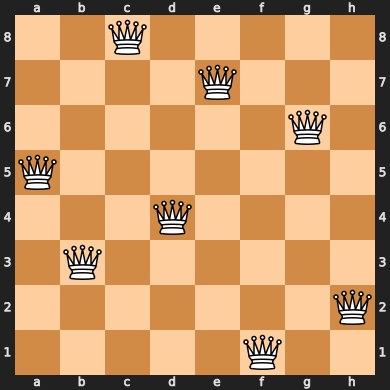

In [5]:
n = 8
solution = next(n_queens(n))

import chess
chess.Board(fen = fen_notation(n, solution))